## Исследование данных о российском кинопрокате





Описание проекта
Заказчик этого исследования — Министерство культуры Российской Федерации.
Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю.
Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

Цель исследования:
1) Изучить сколько фильмов выходило в прокат каждый год (обратить внимание, что данные о прокате в кинотеатрах известны не для всех фильмов). Посчитать, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.
2) Изучить, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?
3) С помощью сводной таблицы посчитать среднюю и медианную сумму сборов для каждого года.
4) Определить, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположить, с чем это может быть связано.
5) Исследование фильмов, которые получили государственную поддержку.

Ход исследования:
Данные представлены в двух файлах /datasets/mkrf_movies.csv и /datasets/mkrf_shows.csv. о качестве данных ничего неизвестно, пожтому пере проверкой гипотезу понадобится обзор данных. Данные будут проверены на ошибки и будет оценено их влияние на исследование. Затем на этапе предобратобки удет проведен поиск возможности исправления самых критичных ошибок данных.

таким образом, исследование пройдет в 5 шагов:
1. Обзор данных
2. Предобработка данных
3. Проверка исследовательского анализа данных
4. Исследование фильмов, которые получили государственную поддержку
5. Общий вывод


### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd# импортируем библиотеку, стандартно используется имя pd

import matplotlib.pyplot as plt# импортируем библиотеку, стандартно используется имя plt

import seaborn as sns# импортируем библиотеку, стандартно используется имя sns

import numpy as np# импортируем библиотеку, стандартно используется имя np

df_movies = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')# Чтение данных из файла
display(df_movies.tail(2))#выводим последние строки на экран

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
7485,"Машины песенки. Серия ""Когда цветут кактусы""",124010719,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",И.Трусов,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.3,"комедия,вестерн"


In [2]:
df_show = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')# Чтение данных из файла
display(df_show.head())#выводим первые строки на экран

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


В названии колонки puNumber видны нарушения стиля. Строчные буквы сочетаются с прописными и слова не разделяются нижним подчеркиванием. Приведем названия в обоих таблицах в соответствие с хорошим стилем, используя метод rename().

In [3]:
df_show = df_show.rename(columns ={'puNumber':'pu_number'})#переименуем столбец puNumber
df_movies = df_movies.rename(columns ={'puNumber':'pu_number'})#переименуем столбец puNumber
display(df_show.columns)#выведем на экран получившееся значение
df_movies.columns#выведем на экран получившееся значение

Index(['pu_number', 'box_office'], dtype='object')

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres'],
      dtype='object')

In [4]:
df_movies.info()#выводим сводную информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
pu_number                7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB


In [5]:
df_movies[df_movies['pu_number']=='нет']#puNumber содержит значение нет

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_movies['pu_number'] = df_movies['pu_number'].replace('нет', '0')#Методом replace() заменим значения в столбце puNumber "нет" на 0
df_movies['pu_number'] = df_movies['pu_number'].astype('int')# Возвращает новую колонку, не заменяя предыдущую. Для замены, нужно выполнить присваивание.
df_movies.info()#выводим сводную информацию о таблице для проверки внесенных изменений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
pu_number                7486 non-null int64
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), int64(1), object(11)
memory usage: 877.4+ KB


In [7]:
df_show.info()#выводим сводную информацию о таблице show

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
pu_number     3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [8]:
df = df_movies.merge(df_show, on='pu_number', how='left')#используем режим объединения left,когда в результате слияния обязательно будут все строки из левого DataFrame (в нашем случае df_movies)
df.head(2)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN


***Вывод***

Итак, в двух таблицах было 16 столбцов (14 столбцов в таблице df_movies и 2 столбца в таблице df_show).
Установили в названии колонки pu_number нарушения стиля и устранили перед объединением таблиц методом rename().
Методом merge() объединили 2 таблицы. 
Описание данных получившейся таблицы.

title — название фильма;
pu_number — номер прокатного удостоверения;
show_start_date — дата премьеры фильма;
type — тип фильма;
film_studio — студия-производитель;
production_country — страна-производитель;
director — режиссёр;
producer — продюсер;
age_restriction — возрастная категория;
refundable_support — объём возвратных средств государственной поддержки;
nonrefundable_support — объём невозвратных средств государственной поддержки;
financing_source — источник государственного финансирования;
budget — общий бюджет фильма;
ratings — рейтинг фильма на КиноПоиске;
genres — жанр фильма.
puNumber — номер прокатного удостоверения;
box_office — сборы в рублях.

Данные содержат информацию из реестра прокатных удостоверений и сведения о показах фильмов в российских кинотеатрах.

Предварительном можно утверждать в данных достаточно для проверки гипотез. Но вданных встречаются следующие проблемы.
1. В столбце ratings данные содержат знак '%' и определены в процентах.
2. В столбце state_support_ratio содрежится значение inf
3. Данные содержат пропущенные значения
4. Данные содержат дубликаты

После предобработки данных исследование станет более точным.
Чтобы двигаться дальше надо устранить проблемы в данных.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [9]:
df.info()#выводим сводную информацию о таблице

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
pu_number                7486 non-null int64
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(4), int64(1), object(11)
memory usage: 994.2+ KB


In [10]:
df['ratings'].unique()#выведем Метод unique() для просмотра всех уникальных значений в столбце

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [11]:
def string_to_float(x):#создадим функцию для изменения данных, содержащих %
    x = str(x)
    if x[-1] == '%':
        return float(x[0:-1]) / 10
    return float(x)

df['ratings'] = df['ratings'].apply(string_to_float)#применим функцию к столбцу
display(df['ratings'])
display(df['ratings'].unique())#проверим итоговый результат

0       7.2
1       6.6
2       6.8
3       6.8
4       6.8
       ... 
7481    NaN
7482    5.4
7483    NaN
7484    NaN
7485    6.3
Name: ratings, Length: 7486, dtype: float64

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

В столбце show_start_date отражен тип данных object. Переведем данные из строки в дату и время.

In [12]:
df['show_start_date'] = df['show_start_date'].values.astype('datetime64[D]')
df['show_start_date'].head(2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  """Entry point for launching an IPython kernel.


0   2015-11-27
1   2016-09-13
Name: show_start_date, dtype: datetime64[ns]

In [13]:
pd.options.display.float_format = '{:,.3f}'.format#для всех данных установим формат

***Вывод***

Изучение типа данных обнаружила следующую проблему:
1. в столбце ratings содержались значения в процентах. С помощью функции устранили указанную проблему.
2. в столбце show_start_date отражен тип данных object. Перевели данные из строки в дату и время.



#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [14]:
(len(df))#Вычислиv длину списка

7486

In [15]:
df.isna().sum()#определим пропущенные значения

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

In [16]:
#создадим функцию, получющую на вход название признака, и возвращающую число пропущенных значений
def print_nan_ratio(column):
    print('В {0} пропущено {1} значений'.format(column, "{:.2%}".format((len(df) - df[column].count())/len(df))))
print_nan_ratio('refundable_support')
print_nan_ratio('nonrefundable_support')
print_nan_ratio('genres')
print_nan_ratio('producer')
print_nan_ratio('director')
print_nan_ratio('film_studio')
print_nan_ratio('box_office')
print_nan_ratio('title')
print_nan_ratio('show_start_date')
print_nan_ratio('film_studio')
print_nan_ratio('ratings')
print_nan_ratio('financing_source')
print_nan_ratio('production_country')
print_nan_ratio('budget')

#refundable_support_median = df.pivot_table(index='budget', values='refundable_support', aggfunc=['median', 'count'])
#refundable_support_median.columns = ['median', 'count']
#refundable_support_median.head()

В refundable_support пропущено 95.57% значений
В nonrefundable_support пропущено 95.57% значений
В genres пропущено 13.04% значений
В producer пропущено 7.59% значений
В director пропущено 0.12% значений
В film_studio пропущено 0.24% значений
В box_office пропущено 57.81% значений
В title пропущено 0.00% значений
В show_start_date пропущено 0.00% значений
В film_studio пропущено 0.24% значений
В ratings пропущено 12.92% значений
В financing_source пропущено 95.57% значений
В production_country пропущено 0.03% значений
В budget пропущено 95.57% значений


***Вывод***


Поскольку в столбцах пропущены уникальные значения, то заменять их не будем:
- genres
- producer
- director
-  film_studio
- title
- show_start_date
- financing_source
- production_country.

Для столбцов:
- budget
- refundable_support
- nonrefundable_support

пропущенные значения скорее всего обозначают, что фильмы были без государственно поддержки.

Для столбца 
- ratings

значения заменять не будем, т.к на величину рейтинга может влиять слишком много факторов.

#### Шаг 2.3. Изучите дубликаты

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

In [17]:
df.duplicated().sum()# установим количество дубликатов

0

In [18]:
# напишем функцию для устранения дубликатов
def my_replace(string):
    if type(string) == float:
        return string
    return string.replace(' ', '').replace('-', ',').replace('ЧешскаяРеспублика', 'Чехия')
df['production_country'] = df['production_country'].apply(my_replace)
df['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР,Венгрия',
       'Германия,Великобритания', 'Великобритания,Италия', 'Чехословакия',
       'США,Франция,Турция', 'НоваяЗеландия', 'Канада,Франция,Испания',
       'США,Германия', 'США,Великобритания', 'Великобритания',
       'Франция,Мексика,США', 'Россия,Казахстан,США', 'СССР,Швеция',
       'СССР,Франция,Англия,Куба,ГДР', 'Германия',
       'Великобритания,США,Германия,КНР', 'СССР,ЧССР,ЗападныйБерлин,ПНР',
       'СССР,Италия', 'Гонконг,КНР', 'США,Франция',
       'США,Япония,Франция,Великобритания',
       'Гонконг,Сингапур,Таиланд,Великобритания', 'США,Канада',
       'Франция,Италия,Великобритания,США', 'Франция,США',
       'Ирландия,Великобритания,Германия', 'Чехия', 'США,Австралия',
       'СССР,Финляндия', 'США,Франция,Великобритания,Австрия',
       'США,Бельгия', 'США,Ирландия,Великобритания', 'Великобритания,США',
       'Люксембург,Нидерланды,Испания,Великобритания,США,Италия',
       'Великобритания,Франция,США', 'НоваяЗеландия,США

In [19]:
display(len(df['pu_number']) - len(df['pu_number'].unique()))
df['pu_number'].sort_values().unique()

2

array([        0,   1811096, 111000110, ..., 226019110, 231001012,
       231001111])

In [20]:
table = df.sort_values(by='pu_number').reset_index()
list_duplicates = []
list_free = [226019111, 226019112]
for i in range(len(table) - 1):
    if table['pu_number'][i] == table['pu_number'][i + 1]:
        list_duplicates.append(table['pu_number'][i])
        table['pu_number'][i + 1] = list_free.pop()
display(df.query('pu_number in @list_duplicates'))
df = table

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.000,"мелодрама,комедия",nan
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...","Германия,Великобритания,Италия,Испания",Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.600,"драма,мелодрама,история",nan
5067,Анализируй это!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД","США,Австралия",ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.400,"комедия,криминал",nan
5068,Анализируй то!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,nan,nan,nan,NaN,6.800,"комедия,криминал",nan


In [21]:
display(len(df['pu_number']) - len(df['pu_number'].unique()))

0

***Вывод***

При изучении данных, полных дубликатов не установлено. Устранены совпадения по странам.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

В поле type есть несколько значений, у которых появился пробел в начале строки. С помощью метода .str.strip устранили все пробелы, которые встречаются в начале и в конце строки.

In [22]:
df['type'].unique()# вывели уникальные значения

array(['Художественный', ' Художественный', 'Научно-популярный',
       'Анимационный', 'Документальный', ' Анимационный', 'Прочие',
       'Музыкально-развлекательный'], dtype=object)

In [23]:
df['type'] = df['type'].str.strip()# устранили все пробелы
df['type'].value_counts()#вывели количество уникальных значений.

Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

In [24]:
df['title'].unique()

array(['Курбан-роман. (История с жертвой)',
       '1001 рецепт влюбленного кулинара',
       'Небесный тихоход (новая цветная версия)', ..., 'Пять препятствий',
       'Первый рай', 'Дэвид Гилмор "Римемба Зет Найт"'], dtype=object)

In [25]:
df['title'] = df['title'].str.strip()
df['title'].unique()

array(['Курбан-роман. (История с жертвой)',
       '1001 рецепт влюбленного кулинара',
       'Небесный тихоход (новая цветная версия)', ..., 'Пять препятствий',
       'Первый рай', 'Дэвид Гилмор "Римемба Зет Найт"'], dtype=object)

In [26]:
df['film_studio'].sort_values().unique()

array([' АНО "Кинофорум"',
       ' Ауматик Интертейнмент, Блюмхаус Продакшнз и др.',
       ' ЗАО "Кинокомпания ФаворитФильм" по заказу ООО "ФАВОРИТ МЕДИА"',
       ...,
       'совместное производство Киностудия "Мосфильм", "Космос-филм" (Франция), "Посейдон Продакшинз Лимитед" (Англия), "ИКАИК" (Куба), ДЕФА (ГДР)',
       'юФилм, Твинпикс', nan], dtype=object)

In [27]:
df['film_studio'] = df['film_studio'].str.strip()
df['film_studio'].sort_values().unique()

array(['"Дино де Лаурентиис" (Италия) при участии Киностудии "Мосфильм"',
       '"Союздетфильм", "Мосфильм", "Москинокомбинат"',
       '"Студия "Птица Феникс" Татьяны Новиковой', ...,
       'совместное производство Киностудия "Мосфильм", "Космос-филм" (Франция), "Посейдон Продакшинз Лимитед" (Англия), "ИКАИК" (Куба), ДЕФА (ГДР)',
       'юФилм, Твинпикс', nan], dtype=object)

In [28]:
df['director'].sort_values().unique()

array([' Йохан Нийенхейс', ' Н.Орлов, Р.Быков', ' Р.Асхаев', ...,
       'хореография Фредерика Аштона', 'хореография Фредерика Эштона',
       nan], dtype=object)

In [29]:
df['director'] = df['director'].str.strip()
df['director'].sort_values().unique()

array(['Ёлкин Туйчиев', 'Ён Сан-хо', 'А Андрющенко', ...,
       'хореография Фредерика Аштона', 'хореография Фредерика Эштона',
       nan], dtype=object)

In [30]:
df['producer'] = df['producer'].str.strip()
df['producer'].sort_values().unique()

array(['"Фонд Михаила Калатозова"', 'Ёсиаки Нисимура, Джеффри Уэкслер',
       'А. Калюжный', ..., 'Яэль Бергман, Лаура Уотерс, Питер Хеллайар',
       'Яэль Фогель, Летиция Гонзалез', nan], dtype=object)

In [31]:
df['genres'].sort_values().unique()

array(['аниме,мультфильм', 'аниме,мультфильм,боевик',
       'аниме,мультфильм,детектив', 'аниме,мультфильм,драма',
       'аниме,мультфильм,комедия', 'аниме,мультфильм,короткометражка',
       'аниме,мультфильм,мелодрама', 'аниме,мультфильм,приключения',
       'аниме,мультфильм,ужасы', 'аниме,мультфильм,фантастика',
       'аниме,мультфильм,фэнтези', 'биография', 'биография,военный,драма',
       'биография,документальный', 'биография,драма',
       'биография,драма,военный', 'биография,драма,история',
       'биография,драма,криминал', 'биография,история',
       'биография,история,драма', 'биография,криминал,драма',
       'биография,криминал,триллер', 'биография,мелодрама,драма',
       'биография,музыка,драма', 'биография,музыка,мюзикл',
       'биография,спорт,драма', 'биография,спорт,история',
       'биография,спорт,комедия', 'боевик', 'боевик,вестерн,приключения',
       'боевик,военный', 'боевик,военный,драма', 'боевик,военный,история',
       'боевик,детектив', 'боевик,драм

In [32]:
df['genres'] = df['genres'].str.strip()
df['genres'].sort_values().unique()

array(['аниме,мультфильм', 'аниме,мультфильм,боевик',
       'аниме,мультфильм,детектив', 'аниме,мультфильм,драма',
       'аниме,мультфильм,комедия', 'аниме,мультфильм,короткометражка',
       'аниме,мультфильм,мелодрама', 'аниме,мультфильм,приключения',
       'аниме,мультфильм,ужасы', 'аниме,мультфильм,фантастика',
       'аниме,мультфильм,фэнтези', 'биография', 'биография,военный,драма',
       'биография,документальный', 'биография,драма',
       'биография,драма,военный', 'биография,драма,история',
       'биография,драма,криминал', 'биография,история',
       'биография,история,драма', 'биография,криминал,драма',
       'биография,криминал,триллер', 'биография,мелодрама,драма',
       'биография,музыка,драма', 'биография,музыка,мюзикл',
       'биография,спорт,драма', 'биография,спорт,история',
       'биография,спорт,комедия', 'боевик', 'боевик,вестерн,приключения',
       'боевик,военный', 'боевик,военный,драма', 'боевик,военный,история',
       'боевик,детектив', 'боевик,драм

***Вывод***

В полях встречаются значения, у которых появился пробел в начале строки.
С помощью метода .str.strip устранили все пробелы, 
которые встречаются в начале и в конце строки.


#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [33]:
df['budget'] = df['budget'].replace(0, np.NaN)#в столбце budget произведем замену 0 на NaN
df['budget'].sort_values().unique()

array([1.44624640e+07, 1.50100000e+07, 1.81664180e+07, 1.87060800e+07,
       2.70000000e+07, 2.81155800e+07, 2.85714290e+07, 3.00000000e+07,
       3.04489110e+07, 3.08000000e+07, 3.13053130e+07, 3.30000000e+07,
       3.50000000e+07, 3.52969500e+07, 3.57142860e+07, 3.57600600e+07,
       3.60162690e+07, 3.62595000e+07, 3.70009900e+07, 3.71428570e+07,
       3.73712620e+07, 3.74247960e+07, 3.75000000e+07, 3.76000000e+07,
       3.77442800e+07, 3.77656540e+07, 3.78491030e+07, 3.78787870e+07,
       3.78891650e+07, 3.79436520e+07, 3.80000000e+07, 3.84400000e+07,
       3.84615380e+07, 3.84667000e+07, 3.84768690e+07, 3.85000000e+07,
       3.88582600e+07, 3.90000000e+07, 3.90579710e+07, 3.91292890e+07,
       3.97000000e+07, 3.99900000e+07, 4.00000000e+07, 4.00151220e+07,
       4.02650000e+07, 4.02877700e+07, 4.05000000e+07, 4.05741400e+07,
       4.06008000e+07, 4.10000000e+07, 4.14978600e+07, 4.19989840e+07,
       4.20000000e+07, 4.22525090e+07, 4.28600000e+07, 4.30000000e+07,
      

***Вывод***

С целью проведения дальнейшего исследования, заменили в столбце budget 0  на NaN.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [34]:
df['year'] = df['show_start_date'].dt.year# Получим год
df['year'].head()

0    2014
1    2010
2    2010
3    2011
4    2012
Name: year, dtype: int64

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [35]:
# Создадим функцию, в которую подаем строку, и возвращаем первые значения строки
def head_first(string):
    return str(string).split(',')[0]

# применим функцию к столбцам director и genres
df['director_name'] = df['director'].apply(head_first)
df['main_genres'] = df['genres'].apply(head_first)
df.tail(2)#выведем результат

,index,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,director_name,main_genres
7484,1011,ТотКтоПрошелСквозьОгонь,231001012,2015-04-23,Художественный,"Министерство культуры Украины, Государственное...",Украина,М.Ильенко,В.Филиппов,«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.200,"драма,приключения,биография",nan,2015,М.Ильенко,драма
7485,5249,Мелодия для шарманки,231001111,2011-12-27,Художественный,Сота Синема Груп,Украина,Кира Муратова,Олег Кохан,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,6.700,драма,nan,2011,Кира Муратова,драма


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [36]:
df['state_support_ratio'] = (df['nonrefundable_support']+df['refundable_support'])/df['budget']*100#создадим новый столбец, который отражает какую долю от общего бюджета фильма составляет государственная поддержка 
df['state_support_ratio'].tail(11)

7475   nan
7476   nan
7477   nan
7478   nan
7479   nan
7480   nan
7481   nan
7482   nan
7483   nan
7484   nan
7485   nan
Name: state_support_ratio, dtype: float64

In [37]:
df['state_support_ratio'].mean()

51.73858197698939

***Вывод***

Добавили новые столбцы:
1. столбец state_support_ratio содержит информацию о том, какую долю от общего бюджета фильма составляет государственная поддержка.
2. столбцы director_name и main_genres, с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы вошли первые значения из списка режиссёров и жанров соответственно.

Установлено. что гос. поддержка в среднем покрывает только часть бюджета.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

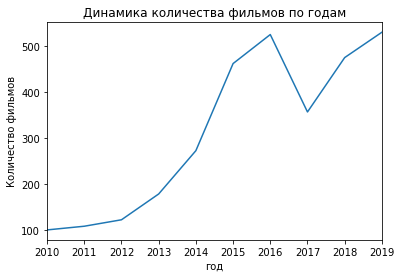

year
2010    101
2011    109
2012    123
2013    179
2014    273
2015    462
2016    525
2017    357
2018    475
2019    530
Name: title, dtype: int64

In [38]:

df.query('box_office > 0').groupby('year')['title'].count().plot()#построим график 
plt.title('Динамика количества фильмов по годам')#название графика
plt.xlabel('год')#название оси абсцисс
plt.ylabel('Количество фильмов')#название оси ординат
plt.show()#выведем график
display(df.query('box_office > 0').groupby('year')['title'].count())



In [39]:
film_rental = df.query('box_office > 0')#получим срез данных методом query() по фильмам, по которым известны данные о прокате
(len(film_rental)/(len(df))*100)#посчитаем долю фильмов, по которым известные данные о прокате в кинотеатрах.

41.86481432006412

- Изучите, как менялась динамика проката по годам. 

In [40]:
film_rental.groupby('year')['box_office'].sum().sort_index().reset_index()#сгруппируем данные по возрастанию по годам

,year,box_office
0,2010,"2,428,654.000"
1,2011,"14,102,765.000"
2,2012,"6,955,423.000"
3,2013,"29,799,706.200"
4,2014,"7,444,951,859.200"
5,2015,"39,497,365,196.400"
6,2016,"47,866,299,741.910"
7,2017,"48,563,707,217.510"
8,2018,"49,668,403,134.320"
9,2019,"48,425,708,779.590"


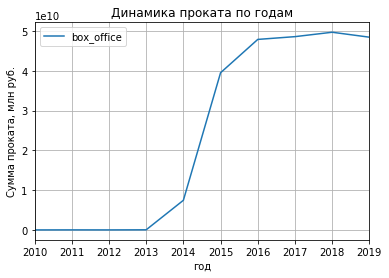

In [41]:
film_rental.groupby('year')['box_office'].sum().sort_index().reset_index().plot(x='year', y='box_office', grid = True)#построим график по сгруппированным данным 
plt.title('Динамика проката по годам')#название графика
plt.xlabel('год')#название оси абсцисс
plt.ylabel('Сумма проката, млн руб.')# название оси ординат
plt.show()#выведем график 

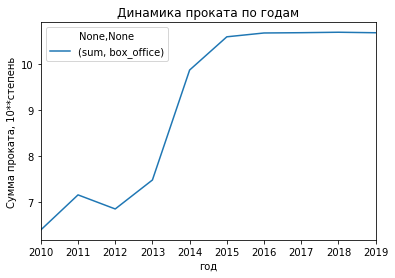

In [42]:
table = film_rental.pivot_table(index='year', values = 'box_office', aggfunc=['sum'])

table['sum'] = table['sum'].apply(np.log10)#применим функцию логарифма
table.plot()#построим график нелинейного роста
plt.title('Динамика проката по годам')#название графика
plt.xlabel('год')#название оси абсцисс
plt.ylabel('Сумма проката, 10**степень')#название оси ординат
plt.show()#выведем график

В каком году сумма сборов была минимальной? А максимальной?

In [43]:
film_rental.groupby('year')['box_office'].sum().sort_values().reset_index()#сгруппируем данные по возрастанию по сумме сбора

,year,box_office
0,2010,"2,428,654.000"
1,2012,"6,955,423.000"
2,2011,"14,102,765.000"
3,2013,"29,799,706.200"
4,2014,"7,444,951,859.200"
5,2015,"39,497,365,196.400"
6,2016,"47,866,299,741.910"
7,2019,"48,425,708,779.590"
8,2017,"48,563,707,217.510"
9,2018,"49,668,403,134.320"


Максимальная сумма сборов была в 2018 году и составила 49,668,403,134.320 руб., минимальная сумма сборов была в 2010 году и составила 2,428,654.000 рублей.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [44]:
film_rental.pivot_table(index='year', values = 'box_office', aggfunc=['mean', 'median'])# Cормируем сводную таблицу с медианным и средним зачением для каждого года.

,mean,median
,box_office,box_office
year,,
2010,"24,046.079","1,710.000"
2011,"129,383.165","3,000.000"
2012,"56,548.154","6,220.000"
2013,"166,478.806","3,580.000"
2014,"27,270,885.931","20,400.000"
2015,"85,492,132.460","5,003,450.150"
2016,"91,173,904.270","3,915,041.020"
2017,"136,032,793.326","9,968,340.000"


Как вдино из таблицы выше, минимальные средняя и медианные значения приходились на 2010 год и составили 24,046.079	и 1,710.000 соответственно. Максимальные средняя и медианные значения приходились на 2017 год и составили 136,032,793.326 и	9,968,340.000 соответственно.

Большие различия между медианой и средним значением заключаются в том, что медианные значения это значение, справа и слева от которого находится равное число наблюдений. А среднее это средние сборы между сборами у самых кассовых фильмов и у фильмов с небольшими сборами.

In [45]:
film_rental_year = film_rental.query('year>=2015')#сделаем срез данных за период с 2015 года
film_rental_year.head(2)#выведем данные на экран

,index,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,director_name,main_genres,state_support_ratio
7,2397,Небесный верблюд,111000115,2015-01-14,Художественный,"ООО Продюсерский центр ""Всё хорошо""",Россия,Ю.Фетинг,И.Плиско,«0+» - для любой зрительской аудитории,...,"34,000,000.000","49,280,496.000",Министерство культуры,6.700,"детский,семейный","61,040.000",2015,Ю.Фетинг,детский,68.993
8,3136,"Статус: ""Свободен""",111000116,2016-01-13,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Ливнев, Д.Козловский, С.Бобза",«16+» - для детей старше 16 лет,...,"20,000,000.000","78,686,500.000",Фонд кино,5.800,"комедия,мелодрама","153,030,013.400",2016,П.Руминов,комедия,50.835


In [46]:
(len(film_rental_year))#посчитаем количество фильмов за период с 2015 по 2019

2349

In [47]:
film_rental_year.groupby('age_restriction')['age_restriction'].count()#посчитаем количество фильмов для каждой возрастной категории

age_restriction
«0+» - для любой зрительской аудитории     90
«12+» - для детей старше 12 лет           347
«16+» - для детей старше 16 лет           803
«18+» - запрещено для детей               792
«6+» - для детей старше 6 лет             317
Name: age_restriction, dtype: int64

In [48]:
age_influence = film_rental_year.pivot_table(index=['year', 'age_restriction'], values = 'box_office', aggfunc=['sum'])#создадим сводную таблицу с данными о сумме сборов, сгруппированные по годам и по возрасту пользователей
age_influence['box_office'] = age_influence['sum']['box_office']
age_influence = age_influence[['box_office']].reset_index()
# создадим функцию, которая добавит в новый список возраст для наглядности 
list = []
for i in range(len(age_influence)):
    s = age_influence['age_restriction'][i]
    if '12' in s:
        list.append(12)
    elif '16' in s:
        list.append(16)
    elif '18' in s:
        list.append(18)
    elif '6' in s:
        list.append(6)
    else:
        list.append(0)
        
age_influence['age'] = list#в столбец age добавим значения созданного из функции списка
age_influence = age_influence[['year', 'age', 'box_office']]#создадим таблицу
age_influence = age_influence.sort_values(by=['year', 'age'], ascending = False)#отсортируем по возрасту
age_influence#выведем на экран получившуюся таблицу


,year,age,box_office
,,,
23,2019,18,"10,121,796,303.640"
22,2019,16,"12,753,418,984.600"
21,2019,12,"12,680,198,773.670"
24,2019,6,"12,852,548,650.860"
20,2019,0,"17,746,066.820"
18,2018,18,"8,760,085,501.150"
17,2018,16,"16,503,602,346.960"
16,2018,12,"14,267,291,660.690"
19,2018,6,"10,104,974,623.410"


In [49]:
box_max_by_age = age_influence
box_max_by_age['max_box'] = box_max_by_age.groupby('year')['box_office'].transform(max)#сгруппируем, по годам, используя только максимумы для каждого года
box_max_by_age = box_max_by_age[box_max_by_age['box_office'] == box_max_by_age['max_box']][['year', 'box_office', 'age']]#проведем логическую индексацию
box_max_by_age.sort_values(by='year')#отсортируем по годам по возрастанию

,year,box_office,age
,,,
1,2015,"13,616,082,008.910",12
7,2016,"16,664,548,541.740",16
12,2017,"18,745,042,900.060",16
17,2018,"16,503,602,346.960",16
24,2019,"12,852,548,650.860",6


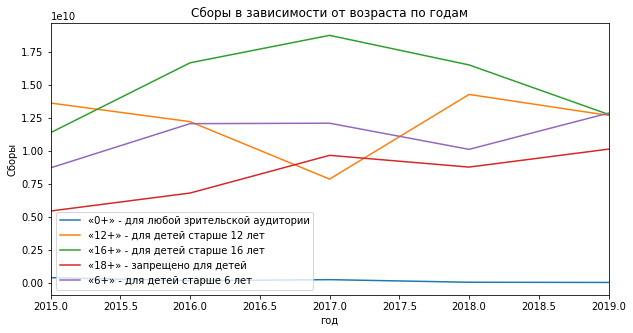

In [50]:
import matplotlib.pyplot as plt
film_rental_year.pivot_table(index='year', columns=['age_restriction'], values=['box_office'], aggfunc='sum').plot(y = 'box_office', figsize=(10,5))
# table = age_influence.pivot_table(index='')
plt.title('Сборы в зависимости от возраста по годам')#название графика
plt.xlabel('год')#название оси абсцисс
plt.ylabel('Сборы')#название оси ординат
plt.legend()
plt.show()#выведем график


# ***ВЫВОД***

1) При изучении вопроса о том, сколько фильмов выходило в прокат каждый год установлено. что меньше всего фильмов вышло в прокат в 2010 году и составило 101 фильм. Больше всего фильмов вышло в прокат в 2019 году и составило 530 фильмов.
2) Данные о прокате в кинотеатрах известны не для всех фильмов. Доля, которую составляют фильмы с информацией о прокате в кинотеатрах составляет 41.86%.
3) При изучении изменения динамики проката по годам установлено, что в период с 2012 по 2018 сумма сборов возрастала, а в 2019 снизилась. В период с 2011 по 2012 сумма сборов снизиласть в 2 раза. Установлено, что сумма сборов была минимальной в 2010 году и составила 2,428,654.000, и максимальной в 2018 году и составила 49,668,403,134.320.

4) С помощью сводной таблицы посчитали среднюю и медианную сумму сборов для каждого года. Минимальные средняя и медианные значения приходились на 2010 год и составили 24,046.079	и 1,710.000 соответственно. Максимальные средняя и медианные значения приходились на 2017 год и составили 136,032,793.326 и	9,968,340.000 соответственно.

Кроме того установлено, что фильмы с  возрастным ограничением «16+» в период с 2016 по 2018 собрали больше всего денег в прокате.


### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [51]:
# создадим таблицу с суммой гос.поддержки, бюджетом фильма и % господдержки от бюджета фильма
budget_sum =df['budget'].sum()
df['support'] = df['refundable_support']+df['nonrefundable_support']
df_support = df['refundable_support'].sum()+df['nonrefundable_support'].sum()
pd.DataFrame({"Гос. поддержка": [df_support], "Бюджет фильма":[budget_sum], "%":['{}%'.format(round(df_support / budget_sum * 100, 0))]})

,Гос. поддержка,Бюджет фильма,%
0,"20,200,688,312.000","42,240,265,939.000",48.0%


In [52]:
table = film_rental.query('refundable_support == refundable_support')
len(table)#посчитаем количество строк


318

In [53]:
#создадим таблицу с суммой гос.поддержки, суммой сборов и окупаемостью фильма
box_office = table['box_office'].sum()
pd.DataFrame({"Сборы":[box_office],'Гос. поддержка':[df_support],'Бюджет фильма':[budget_sum], "Окупаемость":['{}%'.format(round(box_office / budget_sum * 100, 0))]})

,Сборы,Гос. поддержка,Бюджет фильма,Окупаемость
0,"42,113,509,574.780","20,200,688,312.000","42,240,265,939.000",100.0%


In [54]:
director_group = df.query('refundable_support > 0')[['box_office', 'budget', 'director_name', 'ratings', 'refundable_support', 'nonrefundable_support']]#сделаем срез данных
director_group_tech = director_group.groupby('director_name')#проведем группировку по director_name
director_group = director_group_tech.mean()
director_group['ratings'] = director_group_tech['ratings'].mean()
director_group = director_group.sort_values(by = 'nonrefundable_support', ascending = False)#отсортируем по убыванию
display(director_group.head(10))
corr = director_group.corr()# создадим таблицу корреляции
corr.style.background_gradient('coolwarm')



,box_office,budget,ratings,refundable_support,nonrefundable_support
director_name,,,,,
Ф.Бондарчук,nan,"944,000,000.000",5.700,"100,000,000.000","400,000,000.000"
А.Кравчук,"717,703,185.530","980,000,000.000",6.000,"100,000,000.000","400,000,000.000"
Н.Лебедев,"1,402,255,390.000","635,283,867.000",7.600,"50,000,000.000","392,104,482.000"
А.Мизгирев,"364,285,139.600","684,200,536.000",6.600,"150,000,000.000","300,000,000.000"
И.Шурховецкий,"590,405,065.000","500,012,729.000",6.400,"100,000,000.000","250,000,000.000"
В.Тодоровский,"228,578,204.000","320,000,000.000",8.500,"10,000,000.000","200,000,000.000"
А.Учитель,"511,775,548.000","1,032,905,957.000",7.700,"110,000,000.000","190,000,000.000"
П.Лунгин,"30,393,100.720","226,271,533.000",6.000,"17,000,000.000","133,000,000.000"
Н.Лопато,"147,606,826.510",nan,6.200,"60,000,000.000","120,000,000.000"


,box_office,budget,ratings,refundable_support,nonrefundable_support
box_office,1,0.255368,0.207477,0.27918,0.323321
budget,0.255368,1,0.153503,0.755278,0.579478
ratings,0.207477,0.153503,1,0.160039,0.235177
refundable_support,0.27918,0.755278,0.160039,1,0.476578
nonrefundable_support,0.323321,0.579478,0.235177,0.476578,1


In [55]:
genres_group = df.query('refundable_support > 0')[['main_genres', 'box_office', 'budget', 'ratings', 'refundable_support', 'nonrefundable_support']]#сделаем срез данных
tabgenres_group_tech = genres_group.groupby('main_genres')#проведем группировку по main_genres
genres_group = tabgenres_group_tech.sum()
genres_group['ratings'] = tabgenres_group_tech['ratings'].mean()
genres_group = genres_group.sort_values(by = 'nonrefundable_support', ascending = False)#сделаем сортировку по убыванию
display(genres_group)

corr = genres_group.corr()#выведем таблицу корреляции
corr.style.background_gradient('coolwarm')



,box_office,budget,ratings,refundable_support,nonrefundable_support
main_genres,,,,,
драма,"5,418,814,803.760","3,966,581,836.000",6.476,"628,346,881.000","1,526,678,397.000"
мультфильм,"4,465,241,392.710","3,772,110,787.000",5.629,"930,000,000.000","965,000,000.000"
комедия,"8,974,307,381.990","2,935,523,277.000",5.614,"796,500,000.000","866,404,000.000"
история,"1,308,108,250.530","1,480,012,729.000",6.200,"200,000,000.000","650,000,000.000"
фантастика,"466,198,671.050","1,467,299,501.000",4.533,"190,000,000.000","650,000,000.000"
фэнтези,"869,178,251.050","1,737,796,162.000",5.580,"233,000,000.000","405,000,000.000"
триллер,"339,988,055.230","689,209,385.000",5.629,"130,000,000.000","359,645,285.000"
приключения,"877,929,319.590","2,833,516,280.000",6.650,"255,000,000.000","265,000,000.000"
криминал,"239,793,863.000","426,594,781.000",7.500,"25,000,000.000","255,000,000.000"


,box_office,budget,ratings,refundable_support,nonrefundable_support
box_office,1,0.767235,0.0109637,0.892035,0.769731
budget,0.767235,1,0.113785,0.906396,0.881697
ratings,0.0109637,0.113785,1,-0.00216535,0.0743627
refundable_support,0.892035,0.906396,-0.00216535,1,0.829892
nonrefundable_support,0.769731,0.881697,0.0743627,0.829892,1


***ВЫВОД***

Гос. поддержка составляет 48% бюджета фильма. Таким образом,гос. поддержка в среднем покрывает только часть бюджета.Окупаемость фильма составляет 61% от бюджета фильма. 
Вне зависимости от жанра, сборы будут одинаково зависеть от гос.поддержки, так как есть корреляция.
При этом сборы будут зависеть от выбора режиссера фильма, так как средние сборы для отдельных режиссеров не коррелируют с гос. поддержкой.

### Шаг 5. Напишите общий вывод

1) Сборы фильмов не сильно, но зависят от возрастной категории зрителя.
2) Вне зависимости от жанра, сборы будут одинаково зависеть от гос.поддержки, так как есть корреляция.
3) При этом сборы будут зависеть от выбора режиссера фильма, так как средние сборы для отдельных режиссеров не коррелируют с гос. поддержкой.
